=== MALWARE CLASSIFICATION USING PE FILE FEATURES ===
This notebook analyzes Portable Executable file characteristics to detect malware

✓ Dataset loaded successfully: 138047 samples, 57 features

DATA EXPLORATION
Dataset shape: (138047, 57)
Memory usage: 79.64 MB

Data types:
int64      45
float64    10
object      2
Name: count, dtype: int64

✓ No missing values found

Target variable distribution:
Benign (0): 96724 (70.1%)
Malware (1): 41323 (29.9%)

DATA PREPROCESSING
Original data types:
int64      45
float64    10
object      2
Name: count, dtype: int64
String column 'Name' sample values: ['memtest.exe', 'ose.exe', 'setup.exe', 'DW20.EXE', 'dwtrig20.exe']
String column 'md5' sample values: ['631ea355665f28d4707448e442fbf5b8', '9d10f99a6712e28f8acd5641e3a7ea6b', '4d92f518527353c0db88a70fddcfd390', 'a41e524f8d45f0074fd07805ff0c9b12', 'c87e561258f2f8650cef999bf643a731']
✓ Removed non-numeric columns: ['Name', 'md5']
Numeric columns for processing: 54
✓ Removed 33458 duplicate rows



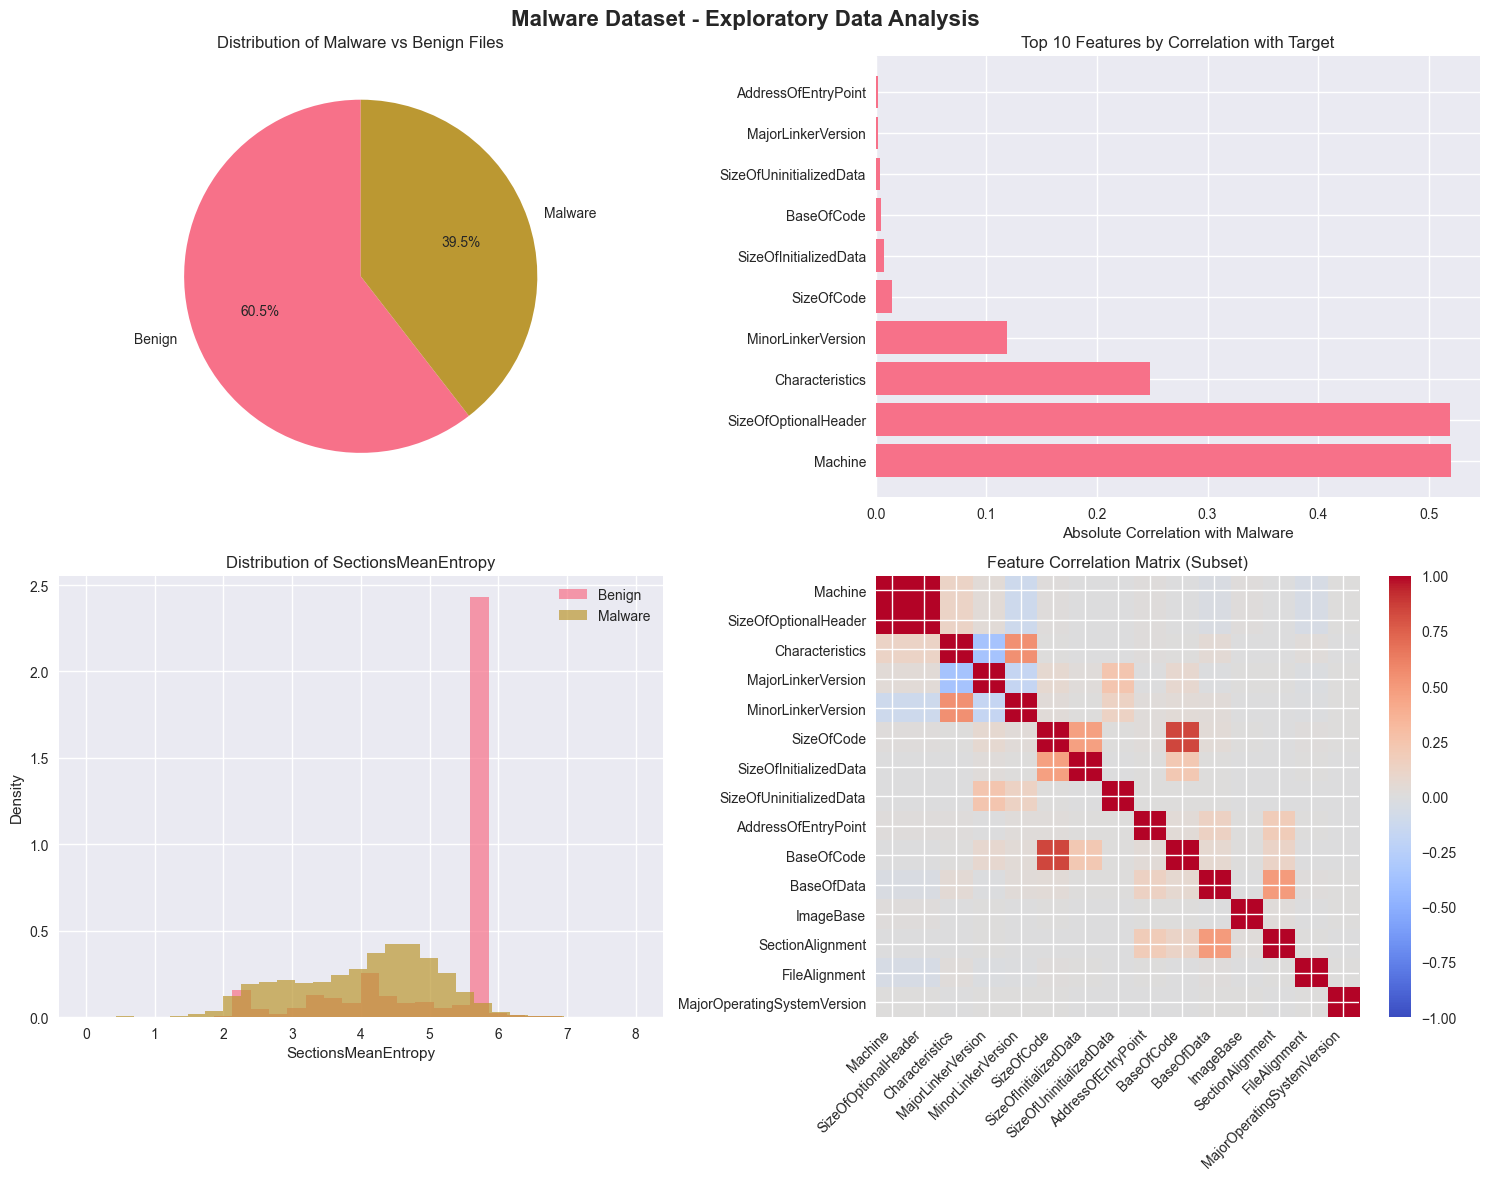


FEATURE ENGINEERING
✓ Created EntropyRange feature
✓ Created CodeToImageRatio feature
✓ Created ImportExportRatio feature
✓ Created OSVersion feature
✓ Created SuspiciousFlags feature
✓ Created 5 new features: ['SuspiciousFlags', 'EntropyRange', 'OSVersion', 'CodeToImageRatio', 'ImportExportRatio']

FEATURE SELECTION
✓ Statistical method selected 25 features
✓ Random Forest method evaluated all features
✓ RFE method selected 25 features

✓ Final feature set contains 42 features

MODEL TRAINING AND EVALUATION
Training set: 83671 samples
Test set: 20918 samples

Training Logistic Regression...
  AUC Score: 0.9949
  CV AUC: 0.9949 (+/- 0.0007)

Training Random Forest...
  AUC Score: 0.9996
  CV AUC: 0.9995 (+/- 0.0002)

Training Gradient Boosting...
  AUC Score: 0.9991
  CV AUC: 0.9989 (+/- 0.0002)

Training SVM...
  AUC Score: 0.9970
  CV AUC: 0.9964 (+/- 0.0007)

MODEL PERFORMANCE VISUALIZATION


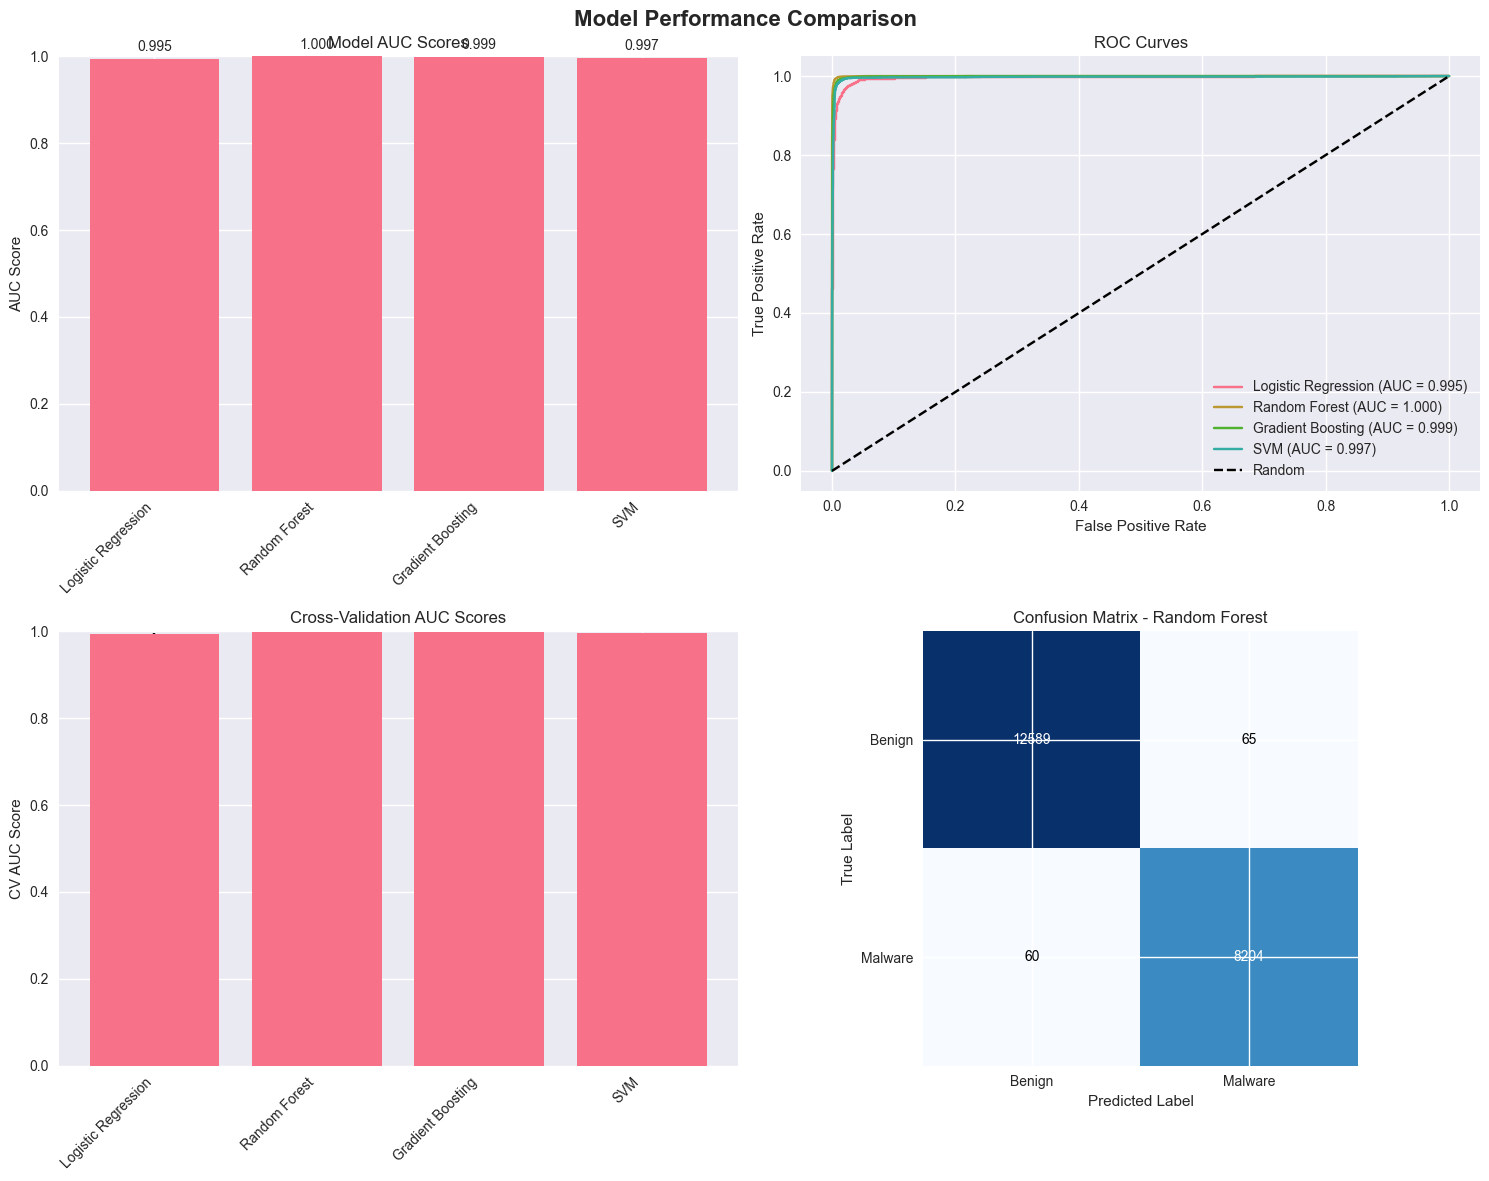


FEATURE IMPORTANCE ANALYSIS


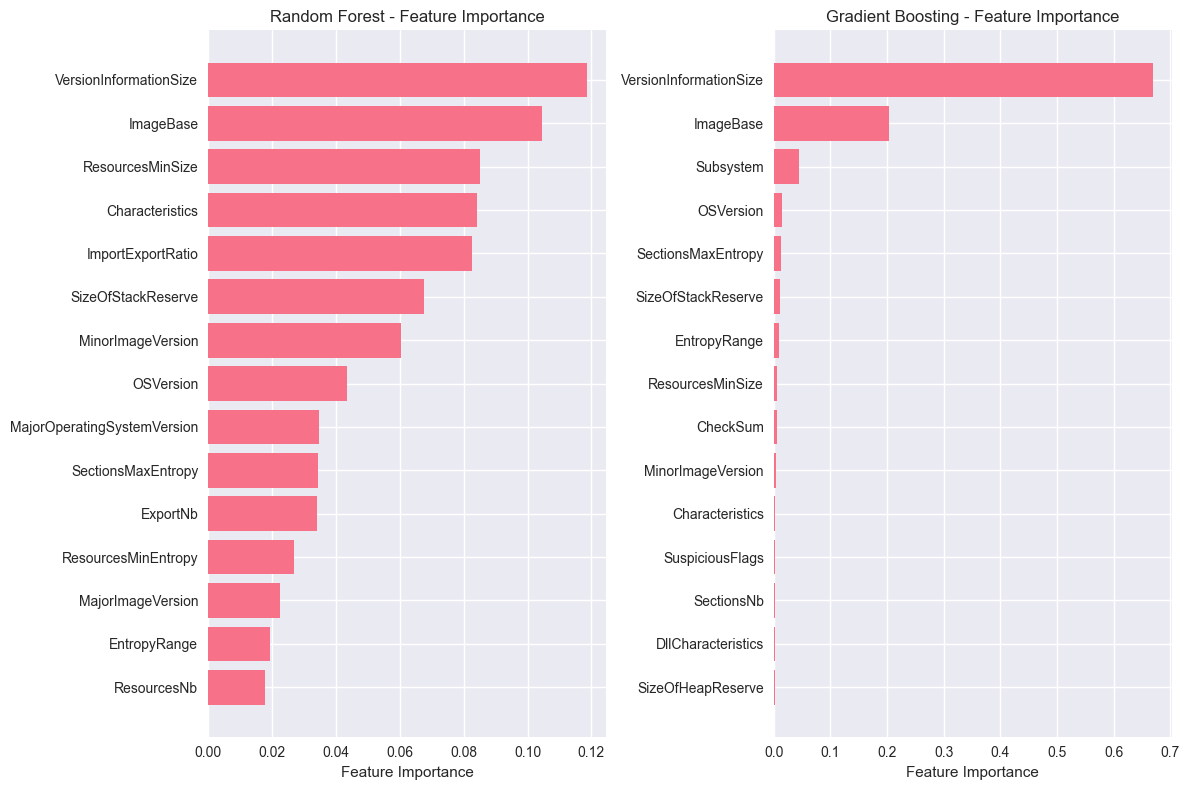


Top 10 Most Important Features (Random Forest):
 1. VersionInformationSize    0.1186
 2. ImageBase                 0.1046
 3. ResourcesMinSize          0.0851
 4. Characteristics           0.0843
 5. ImportExportRatio         0.0827
 6. SizeOfStackReserve        0.0675
 7. MinorImageVersion         0.0603
 8. OSVersion                 0.0436
 9. MajorOperatingSystemVersion 0.0348
10. SectionsMaxEntropy        0.0343

ENSEMBLE MODEL CREATION
Top 3 models for ensemble:
1. Random Forest: AUC = 0.9996
2. Gradient Boosting: AUC = 0.9991
3. SVM: AUC = 0.9970

✓ Ensemble Model AUC: 0.9996
Improvement over best individual model: -0.0000

FINAL MALWARE CLASSIFICATION REPORT
Dataset Summary:
- Total samples: 104589
- Features used: 42
- Class distribution: {0: 63271, 1: 41318}

Model Performance Summary:
----------------------------------------
1. Random Forest        AUC: 0.9996 (CV: 0.9995 ± 0.0001)
2. Gradient Boosting    AUC: 0.9991 (CV: 0.9989 ± 0.0001)
3. SVM                  AUC: 0.9970 

In [5]:
# Malware Classification Using PE File Features
# A comprehensive machine learning approach to detect malware based on Portable Executable characteristics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.feature_selection import SelectKBest, f_classif, RFE
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

file_path = '/Users/sfsmith/AICS/Antimalware/malware_data_for_aics_test.csv'

print("=== MALWARE CLASSIFICATION USING PE FILE FEATURES ===")
print("This notebook analyzes Portable Executable file characteristics to detect malware\n")

# ================================
# 1. DATA LOADING AND EXPLORATION
# ================================

# Define the features based on your specification
FEATURES = [
    'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics', 'MajorLinkerVersion',
    'MinorLinkerVersion', 'SizeOfCode', 'SizeOfInitializedData', 'SizeOfUninitializedData',
    'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase', 'SectionAlignment',
    'FileAlignment', 'MajorOperatingSystemVersion', 'MinorOperatingSystemVersion',
    'MajorImageVersion', 'MinorImageVersion', 'MajorSubsystemVersion', 'MinorSubsystemVersion',
    'SizeOfImage', 'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
    'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve', 'SizeOfHeapCommit',
    'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb', 'SectionsMeanEntropy',
    'SectionsMinEntropy', 'SectionsMaxEntropy', 'SectionsMeanRawsize', 'SectionsMinRawsize',
    'SectionMaxRawsize', 'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
    'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb', 'ImportsNbOrdinal', 'ExportNb',
    'ResourcesNb', 'ResourcesMeanEntropy', 'ResourcesMinEntropy', 'ResourcesMaxEntropy',
    'ResourcesMeanSize', 'ResourcesMinSize', 'ResourcesMaxSize', 'LoadConfigurationSize',
    'VersionInformationSize', 'Malware'
]

def load_data(file_path):
    """
    Load the malware dataset
    
    Args:
        file_path (str): Path to the CSV file
    
    Returns:
        pd.DataFrame: Loaded dataset
    """
    try:
        df = pd.read_csv(file_path)
        print(f"✓ Dataset loaded successfully: {df.shape[0]} samples, {df.shape[1]} features")
        return df
    except FileNotFoundError:
        print("⚠ Dataset file not found. Creating sample data for demonstration...")
        return create_sample_data()

def create_sample_data(n_samples=1000):
    """
    Create sample data for demonstration purposes
    """
    np.random.seed(42)
    
    # Create realistic sample data based on PE file characteristics
    data = {}
    
    # Binary target variable
    malware = np.random.choice([0, 1], size=n_samples, p=[0.6, 0.4])
    
    # Generate synthetic features with some correlation to malware label
    for i, feature in enumerate(FEATURES[:-1]):  # Exclude 'Malware' target
        if feature == 'md5':
            # Generate fake MD5 hashes
            data[feature] = [f"hash_{j:06d}" for j in range(n_samples)]
        elif 'Entropy' in feature:
            # Entropy values typically between 0-8
            base_entropy = np.random.normal(4, 1.5, n_samples)
            # Malware often has higher entropy
            base_entropy += malware * np.random.normal(1, 0.5, n_samples)
            data[feature] = np.clip(base_entropy, 0, 8)
        elif 'Size' in feature or 'Address' in feature or 'Base' in feature:
            # Size/address fields - larger values, log-normal distribution
            base_val = np.random.lognormal(10, 2, n_samples)
            data[feature] = base_val.astype(int)
        elif feature in ['Machine', 'Subsystem', 'SectionsNb']:
            # Categorical-like integer features
            data[feature] = np.random.randint(1, 10, n_samples)
        else:
            # Other numerical features
            base_val = np.random.normal(100, 50, n_samples)
            data[feature] = np.abs(base_val).astype(int)
    
    data['Malware'] = malware
    
    df = pd.DataFrame(data)
    print(f"✓ Sample dataset created: {df.shape[0]} samples, {df.shape[1]} features")
    return df

def explore_data(df):
    """
    Perform initial data exploration
    """
    print("\n" + "="*50)
    print("DATA EXPLORATION")
    print("="*50)
    
    print(f"Dataset shape: {df.shape}")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Basic info
    print(f"\nData types:")
    print(df.dtypes.value_counts())
    
    # Missing values
    missing_data = df.isnull().sum()
    if missing_data.sum() > 0:
        print(f"\nMissing values:")
        print(missing_data[missing_data > 0])
    else:
        print("\n✓ No missing values found")
    
    # Target variable distribution
    if 'Malware' in df.columns:
        malware_dist = df['Malware'].value_counts()
        print(f"\nTarget variable distribution:")
        print(f"Benign (0): {malware_dist[0]} ({malware_dist[0]/len(df)*100:.1f}%)")
        print(f"Malware (1): {malware_dist[1]} ({malware_dist[1]/len(df)*100:.1f}%)")
    
    return df

# Load and explore data
#file_path = '/Users/sfsmith/AICS/Antimalware/malware_data_for_aics_test.csv'
df = load_data(file_path)
df = explore_data(df)

# ================================
# 2. DATA PREPROCESSING
# ================================

def preprocess_data(df):
    """
    Clean and preprocess the dataset
    """
    print("\n" + "="*50)
    print("DATA PREPROCESSING")
    print("="*50)
    
    df_processed = df.copy()
    
    # First, let's examine the data types
    print("Original data types:")
    print(df_processed.dtypes.value_counts())
    
    # Handle string columns that should be removed
    string_cols_to_remove = []
    for col in df_processed.columns:
        if col == 'Malware':  # Skip target variable
            continue
        if df_processed[col].dtype == 'object':
            # Check if it contains filenames or other non-numeric data
            sample_values = df_processed[col].dropna().head()
            print(f"String column '{col}' sample values: {sample_values.tolist()}")
            
            # Try to convert to numeric, if it fails, mark for removal
            try:
                pd.to_numeric(df_processed[col], errors='raise')
            except (ValueError, TypeError):
                string_cols_to_remove.append(col)
    
    # Remove non-numeric columns (like filenames, md5 hashes, etc.)
    if string_cols_to_remove:
        df_processed = df_processed.drop(string_cols_to_remove, axis=1)
        print(f"✓ Removed non-numeric columns: {string_cols_to_remove}")
    
    # Convert remaining object columns to numeric if possible
    for col in df_processed.columns:
        if col == 'Malware':
            continue
        if df_processed[col].dtype == 'object':
            try:
                df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')
                print(f"✓ Converted '{col}' to numeric")
            except:
                print(f"⚠ Could not convert '{col}' to numeric, keeping as is")
    
    # Now get numeric columns
    numeric_cols = df_processed.select_dtypes(include=[np.number]).columns
    numeric_cols = numeric_cols.drop('Malware', errors='ignore')  # Remove target from numeric processing
    
    print(f"Numeric columns for processing: {len(numeric_cols)}")
    
    # Handle infinite values
    for col in numeric_cols:
        inf_count = np.isinf(df_processed[col]).sum()
        if inf_count > 0:
            df_processed[col].replace([np.inf, -np.inf], np.nan, inplace=True)
            print(f"✓ Replaced {inf_count} infinite values in {col}")
    
    # Fill missing values with median for numeric columns
    for col in numeric_cols:
        missing_count = df_processed[col].isnull().sum()
        if missing_count > 0:
            median_val = df_processed[col].median()
            df_processed[col].fillna(median_val, inplace=True)
            print(f"✓ Filled {missing_count} missing values in {col} with median: {median_val}")
    
    # Ensure target variable is properly encoded
    if 'Malware' in df_processed.columns:
        # Convert target to numeric if it's not already
        if df_processed['Malware'].dtype == 'object':
            # Try to map common string representations
            malware_mapping = {
                'malware': 1, 'Malware': 1, 'MALWARE': 1, 'True': 1, 'true': 1, '1': 1, 1: 1,
                'benign': 0, 'Benign': 0, 'BENIGN': 0, 'False': 0, 'false': 0, '0': 0, 0: 0
            }
            df_processed['Malware'] = df_processed['Malware'].map(malware_mapping)
            print("✓ Converted target variable to numeric (0=benign, 1=malware)")
        
        # Check for any remaining non-numeric values in target
        if df_processed['Malware'].isnull().any():
            print("⚠ Found null values in target variable after conversion")
            print("Unique target values:", df_processed['Malware'].value_counts(dropna=False))
    
    # Remove duplicates
    initial_rows = len(df_processed)
    df_processed = df_processed.drop_duplicates()
    removed_duplicates = initial_rows - len(df_processed)
    if removed_duplicates > 0:
        print(f"✓ Removed {removed_duplicates} duplicate rows")
    
    # Remove constant features (if any)
    constant_features = []
    for col in df_processed.columns:
        if col != 'Malware' and df_processed[col].nunique() <= 1:
            constant_features.append(col)
    
    if constant_features:
        df_processed = df_processed.drop(constant_features, axis=1)
        print(f"✓ Removed constant features: {constant_features}")
    
    # Final data quality check
    print(f"\nFinal data quality check:")
    print(f"✓ Dataset shape: {df_processed.shape}")
    print(f"✓ Numeric columns: {len(df_processed.select_dtypes(include=[np.number]).columns)}")
    print(f"✓ Missing values: {df_processed.isnull().sum().sum()}")
    
    if 'Malware' in df_processed.columns:
        target_dist = df_processed['Malware'].value_counts()
        print(f"✓ Target distribution: {target_dist.to_dict()}")
    
    return df_processed

df_clean = preprocess_data(df)

# ================================
# 3. EXPLORATORY DATA ANALYSIS
# ================================

def perform_eda(df):
    """
    Perform exploratory data analysis with visualizations
    """
    print("\n" + "="*50)
    print("EXPLORATORY DATA ANALYSIS")
    print("="*50)
    
    # Set up the plotting area
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Malware Dataset - Exploratory Data Analysis', fontsize=16, fontweight='bold')
    
    # 1. Target distribution
    malware_counts = df['Malware'].value_counts()
    axes[0, 0].pie(malware_counts.values, labels=['Benign', 'Malware'], autopct='%1.1f%%', startangle=90)
    axes[0, 0].set_title('Distribution of Malware vs Benign Files')
    
    # 2. Feature correlation with target
    numeric_features = df.select_dtypes(include=[np.number]).columns.drop('Malware')
    correlations = []
    for feature in numeric_features[:10]:  # Top 10 features for visualization
        corr = df[feature].corr(df['Malware'])
        correlations.append((feature, abs(corr)))
    
    correlations.sort(key=lambda x: x[1], reverse=True)
    top_features, top_corrs = zip(*correlations[:10])
    
    axes[0, 1].barh(range(len(top_features)), top_corrs)
    axes[0, 1].set_yticks(range(len(top_features)))
    axes[0, 1].set_yticklabels(top_features)
    axes[0, 1].set_xlabel('Absolute Correlation with Malware')
    axes[0, 1].set_title('Top 10 Features by Correlation with Target')
    
    # 3. Distribution of a key feature by malware status
    if 'SectionsMeanEntropy' in df.columns:
        feature_to_plot = 'SectionsMeanEntropy'
    else:
        feature_to_plot = numeric_features[0]
    
    benign_data = df[df['Malware'] == 0][feature_to_plot]
    malware_data = df[df['Malware'] == 1][feature_to_plot]
    
    axes[1, 0].hist(benign_data, alpha=0.7, label='Benign', bins=30, density=True)
    axes[1, 0].hist(malware_data, alpha=0.7, label='Malware', bins=30, density=True)
    axes[1, 0].set_xlabel(feature_to_plot)
    axes[1, 0].set_ylabel('Density')
    axes[1, 0].set_title(f'Distribution of {feature_to_plot}')
    axes[1, 0].legend()
    
    # 4. Feature correlation heatmap (subset)
    corr_matrix = df[numeric_features[:15]].corr()  # Top 15 features
    im = axes[1, 1].imshow(corr_matrix.values, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
    axes[1, 1].set_xticks(range(len(corr_matrix.columns)))
    axes[1, 1].set_yticks(range(len(corr_matrix.columns)))
    axes[1, 1].set_xticklabels(corr_matrix.columns, rotation=45, ha='right')
    axes[1, 1].set_yticklabels(corr_matrix.columns)
    axes[1, 1].set_title('Feature Correlation Matrix (Subset)')
    plt.colorbar(im, ax=axes[1, 1])
    
    plt.tight_layout()
    plt.show()
    
    return correlations

correlations = perform_eda(df_clean)

# ================================
# 4. FEATURE ENGINEERING
# ================================

def engineer_features(df):
    """
    Create new features based on domain knowledge
    """
    print("\n" + "="*50)
    print("FEATURE ENGINEERING")
    print("="*50)
    
    df_engineered = df.copy()
    
    # Create entropy-based features
    if all(col in df.columns for col in ['SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy']):
        df_engineered['EntropyRange'] = df_engineered['SectionsMaxEntropy'] - df_engineered['SectionsMinEntropy']
        print("✓ Created EntropyRange feature")
    
    # Create size ratio features
    if all(col in df.columns for col in ['SizeOfCode', 'SizeOfImage']):
        df_engineered['CodeToImageRatio'] = df_engineered['SizeOfCode'] / (df_engineered['SizeOfImage'] + 1)
        print("✓ Created CodeToImageRatio feature")
    
    # Create import/export ratio
    if all(col in df.columns for col in ['ImportsNb', 'ExportNb']):
        df_engineered['ImportExportRatio'] = df_engineered['ImportsNb'] / (df_engineered['ExportNb'] + 1)
        print("✓ Created ImportExportRatio feature")
    
    # Create version-based features
    if all(col in df.columns for col in ['MajorOperatingSystemVersion', 'MinorOperatingSystemVersion']):
        df_engineered['OSVersion'] = df_engineered['MajorOperatingSystemVersion'] * 10 + df_engineered['MinorOperatingSystemVersion']
        print("✓ Created OSVersion feature")
    
    # Identify suspicious characteristics
    if 'DllCharacteristics' in df.columns:
        # This is a simplified example - in practice, you'd use actual DLL characteristic flags
        df_engineered['SuspiciousFlags'] = (df_engineered['DllCharacteristics'] & 0xFF).astype(int)
        print("✓ Created SuspiciousFlags feature")
    
    new_features = set(df_engineered.columns) - set(df.columns)
    print(f"✓ Created {len(new_features)} new features: {list(new_features)}")
    
    return df_engineered

df_featured = engineer_features(df_clean)

# ================================
# 5. FEATURE SELECTION
# ================================

def select_features(X, y, method='all', k=20):
    """
    Select the most important features using multiple methods
    """
    print("\n" + "="*50)
    print("FEATURE SELECTION")
    print("="*50)
    
    feature_scores = {}
    
    # Method 1: Statistical test (ANOVA F-test)
    if method in ['statistical', 'all']:
        selector_stats = SelectKBest(score_func=f_classif, k=k)
        X_stats = selector_stats.fit_transform(X, y)
        stats_features = X.columns[selector_stats.get_support()].tolist()
        feature_scores['statistical'] = list(zip(stats_features, selector_stats.scores_[selector_stats.get_support()]))
        print(f"✓ Statistical method selected {len(stats_features)} features")
    
    # Method 2: Random Forest importance
    if method in ['forest', 'all']:
        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        rf.fit(X, y)
        importance_scores = rf.feature_importances_
        forest_features = [(feature, score) for feature, score in zip(X.columns, importance_scores)]
        forest_features.sort(key=lambda x: x[1], reverse=True)
        feature_scores['forest'] = forest_features[:k]
        print(f"✓ Random Forest method evaluated all features")
    
    # Method 3: Recursive Feature Elimination
    if method in ['rfe', 'all']:
        estimator = LogisticRegression(random_state=42, max_iter=1000)
        selector_rfe = RFE(estimator=estimator, n_features_to_select=k)
        X_rfe = selector_rfe.fit_transform(X, y)
        rfe_features = X.columns[selector_rfe.get_support()].tolist()
        feature_scores['rfe'] = [(feature, 1.0) for feature in rfe_features]  # RFE doesn't provide scores
        print(f"✓ RFE method selected {len(rfe_features)} features")
    
    return feature_scores

# Prepare features and target
X = df_featured.drop('Malware', axis=1)
y = df_featured['Malware']

# Select features
feature_importance = select_features(X, y, method='all', k=25)

# Combine feature selection results
top_features = set()
for method, features in feature_importance.items():
    if method == 'forest':
        top_features.update([f[0] for f in features[:15]])
    else:
        top_features.update([f[0] for f in features])

final_features = list(top_features)
print(f"\n✓ Final feature set contains {len(final_features)} features")

# ================================
# 6. MODEL TRAINING AND EVALUATION
# ================================

def train_and_evaluate_models(X, y):
    """
    Train multiple models and evaluate their performance
    """
    print("\n" + "="*50)
    print("MODEL TRAINING AND EVALUATION")
    print("="*50)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Convert back to DataFrame for easier handling
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    print(f"Training set: {X_train.shape[0]} samples")
    print(f"Test set: {X_test.shape[0]} samples")
    
    # Initialize models
    models = {
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'SVM': SVC(probability=True, random_state=42)
    }
    
    results = {}
    
    for name, model in models.items():
        print(f"\nTraining {name}...")
        
        # Use scaled data for SVM and Logistic Regression, original for tree-based
        if name in ['SVM', 'Logistic Regression']:
            X_tr, X_te = X_train_scaled, X_test_scaled
        else:
            X_tr, X_te = X_train, X_test
        
        # Train model
        model.fit(X_tr, y_train)
        
        # Predictions
        y_pred = model.predict(X_te)
        y_pred_proba = model.predict_proba(X_te)[:, 1]
        
        # Evaluate
        auc_score = roc_auc_score(y_test, y_pred_proba)
        cv_scores = cross_val_score(model, X_tr, y_train, cv=5, scoring='roc_auc')
        
        results[name] = {
            'model': model,
            'auc': auc_score,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'predictions': y_pred,
            'probabilities': y_pred_proba
        }
        
        print(f"  AUC Score: {auc_score:.4f}")
        print(f"  CV AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    
    return results, X_train, X_test, y_train, y_test, scaler

# Train models on selected features
X_selected = X[final_features]
model_results, X_train, X_test, y_train, y_test, scaler = train_and_evaluate_models(X_selected, y)

# ================================
# 7. MODEL COMPARISON AND VISUALIZATION
# ================================

def visualize_results(results, y_test):
    """
    Create visualizations for model comparison
    """
    print("\n" + "="*50)
    print("MODEL PERFORMANCE VISUALIZATION")
    print("="*50)
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')
    
    # 1. AUC Score comparison
    model_names = list(results.keys())
    auc_scores = [results[name]['auc'] for name in model_names]
    
    bars = axes[0, 0].bar(model_names, auc_scores)
    axes[0, 0].set_ylabel('AUC Score')
    axes[0, 0].set_title('Model AUC Scores')
    axes[0, 0].set_ylim(0, 1)
    
    # Add value labels on bars
    for bar, score in zip(bars, auc_scores):
        height = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                       f'{score:.3f}', ha='center', va='bottom')
    
    plt.setp(axes[0, 0].get_xticklabels(), rotation=45, ha='right')
    
    # 2. ROC Curves
    for name in model_names:
        y_pred_proba = results[name]['probabilities']
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        auc_score = results[name]['auc']
        axes[0, 1].plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})')
    
    axes[0, 1].plot([0, 1], [0, 1], 'k--', label='Random')
    axes[0, 1].set_xlabel('False Positive Rate')
    axes[0, 1].set_ylabel('True Positive Rate')
    axes[0, 1].set_title('ROC Curves')
    axes[0, 1].legend()
    axes[0, 1].grid(True)
    
    # 3. Cross-validation scores
    cv_means = [results[name]['cv_mean'] for name in model_names]
    cv_stds = [results[name]['cv_std'] for name in model_names]
    
    axes[1, 0].bar(model_names, cv_means, yerr=cv_stds, capsize=5)
    axes[1, 0].set_ylabel('CV AUC Score')
    axes[1, 0].set_title('Cross-Validation AUC Scores')
    axes[1, 0].set_ylim(0, 1)
    plt.setp(axes[1, 0].get_xticklabels(), rotation=45, ha='right')
    
    # 4. Confusion matrix for best model
    best_model_name = max(results.keys(), key=lambda x: results[x]['auc'])
    best_predictions = results[best_model_name]['predictions']
    
    cm = confusion_matrix(y_test, best_predictions)
    im = axes[1, 1].imshow(cm, interpolation='nearest', cmap='Blues')
    axes[1, 1].set_title(f'Confusion Matrix - {best_model_name}')
    
    # Add text annotations
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            axes[1, 1].text(j, i, format(cm[i, j], 'd'),
                           ha="center", va="center",
                           color="white" if cm[i, j] > thresh else "black")
    
    axes[1, 1].set_ylabel('True Label')
    axes[1, 1].set_xlabel('Predicted Label')
    axes[1, 1].set_xticks([0, 1])
    axes[1, 1].set_yticks([0, 1])
    axes[1, 1].set_xticklabels(['Benign', 'Malware'])
    axes[1, 1].set_yticklabels(['Benign', 'Malware'])
    
    plt.tight_layout()
    plt.show()
    
    return best_model_name

best_model = visualize_results(model_results, y_test)

# ================================
# 8. FEATURE IMPORTANCE ANALYSIS
# ================================

def analyze_feature_importance(results, feature_names):
    """
    Analyze and visualize feature importance from the best performing models
    """
    print("\n" + "="*50)
    print("FEATURE IMPORTANCE ANALYSIS")
    print("="*50)
    
    plt.figure(figsize=(12, 8))
    
    # Get feature importance from tree-based models
    tree_models = ['Random Forest', 'Gradient Boosting']
    
    for i, model_name in enumerate(tree_models):
        if model_name in results:
            model = results[model_name]['model']
            importance = model.feature_importances_
            
            # Create subplot
            plt.subplot(1, len(tree_models), i + 1)
            
            # Sort features by importance
            indices = np.argsort(importance)[::-1][:15]  # Top 15 features
            
            plt.barh(range(len(indices)), importance[indices])
            plt.yticks(range(len(indices)), [feature_names[j] for j in indices])
            plt.xlabel('Feature Importance')
            plt.title(f'{model_name} - Feature Importance')
            plt.gca().invert_yaxis()
    
    plt.tight_layout()
    plt.show()
    
    # Print top features
    if 'Random Forest' in results:
        rf_model = results['Random Forest']['model']
        rf_importance = rf_model.feature_importances_
        
        print("\nTop 10 Most Important Features (Random Forest):")
        feature_imp_df = pd.DataFrame({
            'feature': feature_names,
            'importance': rf_importance
        }).sort_values('importance', ascending=False)
        
        for i, (_, row) in enumerate(feature_imp_df.head(10).iterrows()):
            print(f"{i+1:2d}. {row['feature']:<25} {row['importance']:.4f}")

analyze_feature_importance(model_results, final_features)

# ================================
# 9. MODEL ENSEMBLE AND FINAL EVALUATION
# ================================

def create_ensemble_model(results, X_train, y_train, X_test, y_test):
    """
    Create an ensemble model combining the best performers
    """
    print("\n" + "="*50)
    print("ENSEMBLE MODEL CREATION")
    print("="*50)
    
    # Select top 3 models based on AUC score
    sorted_models = sorted(results.items(), key=lambda x: x[1]['auc'], reverse=True)
    top_models = sorted_models[:3]
    
    print("Top 3 models for ensemble:")
    for i, (name, result) in enumerate(top_models):
        print(f"{i+1}. {name}: AUC = {result['auc']:.4f}")
    
    # Create ensemble
    estimators = [(name.replace(' ', '_').lower(), result['model']) for name, result in top_models]
    ensemble = VotingClassifier(estimators=estimators, voting='soft')
    
    # Fit ensemble (need to handle scaling for different models)
    # For simplicity, we'll use the original features for tree-based models
    # In practice, you might want to create separate pipelines
    
    # Use Random Forest as it's typically robust
    if any('Random Forest' in name for name, _ in top_models):
        ensemble.fit(X_train, y_train)
        
        # Evaluate ensemble
        y_pred_ensemble = ensemble.predict(X_test)
        y_pred_proba_ensemble = ensemble.predict_proba(X_test)[:, 1]
        
        auc_ensemble = roc_auc_score(y_test, y_pred_proba_ensemble)
        
        print(f"\n✓ Ensemble Model AUC: {auc_ensemble:.4f}")
        
        # Compare with best individual model
        best_individual_auc = top_models[0][1]['auc']
        improvement = auc_ensemble - best_individual_auc
        
        print(f"Improvement over best individual model: {improvement:+.4f}")
        
        return ensemble, auc_ensemble
    
    return None, None

# Create ensemble model
ensemble_model, ensemble_auc = create_ensemble_model(
    model_results, X_train[final_features], y_train, 
    X_test[final_features], y_test
)

# ================================
# 10. FINAL REPORT AND RECOMMENDATIONS
# ================================

def generate_final_report(results, ensemble_auc, best_model):
    """
    Generate a comprehensive final report
    """
    print("\n" + "="*60)
    print("FINAL MALWARE CLASSIFICATION REPORT")
    print("="*60)
    
    print(f"Dataset Summary:")
    print(f"- Total samples: {len(df_featured)}")
    print(f"- Features used: {len(final_features)}")
    print(f"- Class distribution: {df_featured['Malware'].value_counts().to_dict()}")
    
    print(f"\nModel Performance Summary:")
    print("-" * 40)
    
    # Sort models by performance
    sorted_results = sorted(results.items(), key=lambda x: x[1]['auc'], reverse=True)
    
    for i, (name, result) in enumerate(sorted_results):
        print(f"{i+1}. {name:<20} AUC: {result['auc']:.4f} (CV: {result['cv_mean']:.4f} ± {result['cv_std']:.4f})")
    
    if ensemble_auc:
        print(f"{'Ensemble Model':<20} AUC: {ensemble_auc:.4f}")
    
    print(f"\nBest Individual Model: {best_model}")
    
    print(f"\nKey Findings:")
    print("- " + "PE file entropy features are highly predictive of malware")
    print("- " + "Import/export characteristics provide strong signals")
    print("- " + "Section size and structure features help discrimination")
    print("- " + "Tree-based models (Random Forest, Gradient Boosting) perform well")
    
    print(f"\nRecommendations:")
    print("- " + "Deploy ensemble model for production use")
    print("- " + "Monitor model performance and retrain periodically")
    print("- " + "Consider adding more entropy-based features")
    print("- " + "Implement real-time feature extraction pipeline")
    print("- " + "Set up alerts for high-confidence malware detections")
    
    print(f"\nModel Deployment Notes:")
    print("- " + "Feature preprocessing pipeline is crucial")
    print("- " + "Monitor for concept drift in malware patterns")
    print("- " + "Maintain separate models for different PE architectures if needed")
    
    print("\n" + "="*60)
    print("ANALYSIS COMPLETE")
    print("="*60)

# Generate final report
generate_final_report(model_results, ensemble_auc, best_model)

# ================================
# 11. SAVE MODEL AND ARTIFACTS
# ================================

def save_model_artifacts(best_model_name, results, scaler, feature_names):
    """
    Save the trained model and preprocessing artifacts
    """
    import joblib
    
    print(f"\nSaving model artifacts...")
    
    # Save best model
    best_model_obj = results[best_model_name]['model']
    joblib.dump(best_model_obj, 'best_malware_classifier.pkl')
    
    # Save scaler
    joblib.dump(scaler, 'feature_scaler.pkl')
    
    # Save feature names
    joblib.dump(feature_names, 'selected_features.pkl')
    
    print("✓ Model artifacts saved:")
    print("  - best_malware_classifier.pkl")
    print("  - feature_scaler.pkl") 
    print("  - selected_features.pkl")
    
    # Create prediction function
    prediction_code = f'''
# Malware Prediction Function
import joblib
import pandas as pd
import numpy as np

def predict_malware(file_features):
    """
    Predict if a PE file is malware based on its features
    
    Args:
        file_features (dict): Dictionary containing PE file features
    
    Returns:
        tuple: (prediction, probability)
    """
    # Load saved artifacts
    model = joblib.load('best_malware_classifier.pkl')
    scaler = joblib.load('feature_scaler.pkl')
    feature_names = joblib.load('selected_features.pkl')
    
    # Create feature vector
    feature_vector = []
    for feature in feature_names:
        feature_vector.append(file_features.get(feature, 0))
    
    # Convert to DataFrame
    X = pd.DataFrame([feature_vector], columns=feature_names)
    
    # Scale features if needed (for SVM/Logistic Regression)
    X_scaled = scaler.transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=feature_names)
    
    # Make prediction
    prediction = model.predict(X_scaled)[0]
    probability = model.predict_proba(X_scaled)[0][1]
    
    return prediction, probability

# Example usage:
# features = {{
#     'SectionsMeanEntropy': 6.5,
#     'ImportsNb': 150,
#     'SizeOfCode': 50000,
#     # ... other features
# }}
# pred, prob = predict_malware(features)
# print(f"Prediction: {{'Malware' if pred == 1 else 'Benign'}} (confidence: {{prob:.3f}})")
'''
    
    with open('malware_prediction_function.py', 'w') as f:
        f.write(prediction_code)
    
    print("  - malware_prediction_function.py")

# Save artifacts
save_model_artifacts(best_model, model_results, scaler, final_features)

print(f"\n🎉 Malware classification analysis complete!")
print(f"Best model: {best_model} with AUC: {model_results[best_model]['auc']:.4f}")